# MARATONA BEHIND THE CODE 2020

## DESAFIO 6 - ANAHUAC

### Introducción

En este desafio, usted usará herramientas de IBM como Watson Studio (o Cloud Pak for Data) para construir un modelo baseado en Machine Learning capaz de preveer si un estudante irá continuar o abandonará su curso.

<hr>

## Installing Libs

In [1]:
!pip install scikit-learn --upgrade

/bin/bash: pip: command not found


In [2]:
!pip install xgboost --upgrade

/bin/bash: pip: command not found


<hr>

## Loading the .csv dataset from GitHub

In [4]:
import pandas as pd

In [5]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/ForTraining.csv
df_base_for_training = pd.read_csv(r'ForTraining.csv')
df_base_for_training.head()

--2020-09-12 17:41:20--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/ForTraining.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.204.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.204.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92376 (90K) [text/plain]
Saving to: ‘ForTraining.csv.1’

ForTraining.csv.1   100%[===================>]  90.21K   304KB/s    in 0.3s    

2020-09-12 17:41:21 (304 KB/s) - ‘ForTraining.csv.1’ saved [92376/92376]



,studentId,reducido,ciclo,Graduado
0,88588.0,Interv. Edu.,2019 - 08,No
1,81135.0,Educacion,2019 - 05,Si
2,80926.0,Direc. Estrat. Neg,2019 - 05,Si
3,82415.0,B. I.,2019 - 06,Si
4,90082.0,Est. Temprana,2019 - 08,No


Descripción: La primera tabla mostrada arriba tiene 4 columnas, 3 son features and el target: `Graduado` that has a binary values={Si, No}.

Usted puede, y debe, usar mas data que esta disponible para construir su modelo. Los siguientes archivos .csv presentados:

In [32]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/OrdenMaterias.csv
df_orden_materias = pd.read_csv(r'OrdenMaterias.csv')
df_orden_materias.head(100)

--2020-09-12 18:08:10--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/OrdenMaterias.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.204.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.204.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63920 (62K) [text/plain]
Saving to: ‘OrdenMaterias.csv.1’

OrdenMaterias.csv.1 100%[===================>]  62.42K   215KB/s    in 0.3s    

2020-09-12 18:08:11 (215 KB/s) - ‘OrdenMaterias.csv.1’ saved [63920/63920]



,reducido,2017 - 03,2017 - 04,2017 - 05,2017 - 06,2017 - 07,2017 - 08,2018 - 01,2018 - 02,2018 - 03,...,2019 - 05,2019 - 06,2019 - 07,2019 - 08,2020 - 01,2020 - 02,2020 - 03,2020 - 04,2020 - 05,2020 - 06
0,Act. Derecho Contratual,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Sin clase,Sin clase,Sin clase,Sin clase,Consentimiento y objeto digital contractual,Métodos alternos de resolución de controversias,Nueva clasificación contractual,Nuevo derecho probatorio documental,Contratos inteligentes,Consentimiento y objeto digital contractual
1,Adm. Emp.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...
2,Adm. Riesgos,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones
3,Adm. Salud,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Calidad en salud,Contabilidad Financiera y Presupuestos,Administración de costos,Salud pública,Planeación estratégica en salud,Calidad en salud,Contabilidad Financiera y Presupuestos,Planeación estratégica en salud,Salud pública,Planeación estratégica en salud
4,Admon Fin.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Planeacion Estrat.,Liderazgo y Motivación,Planeación Estratégica,Toma de Decisiones,Mercadotecnia Estratégica,Calidad,Liderazgo y Motivación,Planeación Estratégica,Toma de Decisiones,Mercadotecnia Estratégica,...,Mercadotecnia Estratégica,Calidad,Liderazgo y Motivación,Planeación Estratégica,Toma de Decisiones,Mercadotecnia Estratégica,Calidad,Liderazgo y Motivación,Planeación Estratégica,Toma de Decisiones
96,Precios Transf.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Principios: Precios de Transferencia,Marco conceptual,BEPS,Metodología,Caso Práctico,Principios: Precios de Transferencia,Marco conceptual,BEPS,Metodología,Caso Práctico
97,Prin. Fiscales,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Principios: Precios de Transferencia,ISR Personas Morales,ISR Personas Físicas,IVA,ISR Personas Morales,Principios: Precios de Transferencia,ISR Personas Morales,ISR Personas Físicas,IVA,Código Fiscal
98,Prof. Deportiva.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Tendencias actuales de entrenamiento juvenil (...,Tendencias actuales de entrenamiento universit...,Metodología moderna de la preparación deportiva,Innovaciones en la preparación física contempo...,Tendencias actuales del entrenamiento infantil...,Tendencias actuales de entrenamiento juvenil (...,Tendencias actuales de entrenamiento universit...,Metodología moderna de la preparación deportiva,Innovaciones en la preparación física contempo...,Tendencias actuales del entrenamiento infantil...


In [7]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaConexiones.csv
df_tabla_conexiones = pd.read_csv(r'TablaConexiones.csv')
df_tabla_conexiones.head()

--2020-09-12 17:41:34--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaConexiones.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.204.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.204.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243492 (238K) [text/plain]
Saving to: ‘TablaConexiones.csv’

TablaConexiones.csv 100%[===================>] 237.79K   323KB/s    in 0.7s    

2020-09-12 17:41:36 (323 KB/s) - ‘TablaConexiones.csv’ saved [243492/243492]



,studentId,ciclo,Dias_Conectado,Minutos_Promedio,Minutos_Total
0,45870,2017 - 03,10.0,76.957000,769.57
1,45898,2017 - 03,32.0,370.231250,11847.40
2,45905,2017 - 03,50.0,198.717400,9935.87
3,45931,2017 - 03,22.0,294.535909,6479.79
4,45933,2017 - 03,18.0,177.991667,3203.85


In [8]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaTareas.csv
df_tabla_tareas = pd.read_csv(r'TablaTareas.csv')
df_tabla_tareas.head()

--2020-09-12 17:41:39--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaTareas.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.204.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.204.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 310923 (304K) [text/plain]
Saving to: ‘TablaTareas.csv’

TablaTareas.csv     100%[===================>] 303.64K   368KB/s    in 0.8s    

2020-09-12 17:41:40 (368 KB/s) - ‘TablaTareas.csv’ saved [310923/310923]



,studentId,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas
0,81328.0,2019 - 05,99.000000,10.0,0.0,0.0,10.0
1,99206.0,2020 - 02,80.777500,10.0,2.0,0.0,12.0
2,94582.0,2020 - 01,79.666000,10.0,0.0,0.0,10.0
3,87564.0,2019 - 07,0.000000,0.0,15.0,0.0,15.0
4,87971.0,2019 - 08,36.363636,5.0,6.0,0.0,11.0


Overview del Dataset:

    Disponibles para el participante, ecisten 4 tables cargas en DataFrames anteriormente:
    
    **df_base_for_training**
        - ``studentId``
        ``reducido``
        ``ciclo``
        ``Graduado`` --> ¡LA VARIABLE OBJETIVO PARA CLASIFICACIÓN BINARIA!
        
    **df_orden_materias**
        ``reducido``
        ``2017 - 03``
        ``2017 - 04``
        ``2017 - 05``
        ``2017 - 06``
        ``2017 - 07``
        ``2017 - 08``
        ``2018 - 01``
        ``2018 - 02``
        ``2018 - 03``
        ``2018 - 04``
        ``2018 - 05``
        ``2018 - 06``
        ``2018 - 07``
        ``2018 - 08``
        ``2019 - 01``
        ``2019 - 02``
        ``2019 - 03``
        ``2019 - 04``
        ``2019 - 05``
        ``2019 - 06``
        ``2019 - 07``
        ``2019 - 08``
        ``2020 - 01``
        ``2020 - 02``
        ``2020 - 03``
        ``2020 - 04``
        ``2020 - 05``
        ``2020 - 06``
        
    **df_tabla_conexiones**
        - ``studentId``
        ``ciclo``
        ``Dias_Conectado``
        ``Minutos_Promedio``
        ``Minutos_Total``
        
    **df_tabla_tareas**
        - ``studentId``
        ``ciclo``
        ``Calificacion_Promedio``
        ``Tareas_Puntuales``
        ``Tareas_No_Entregadas``
        ``Tareas_Retrasadas``
        ``Total_Tareas``
        
Observe que la variable ``studentId`` aparece en varias tablas.

Usted puede combinar/merge estos datasets como usted desee.

In [9]:
print("Columnas en *df_base_for_training*:")
print(df_base_for_training.columns)

print("\Columnas en *df_orden_materias*:")
print(df_orden_materias.columns)

print("\Columnas en *df_tabla_conexiones*:")
print(df_tabla_conexiones.columns)

print("\Columnas en *df_tabla_tareas*:")
print(df_tabla_tareas.columns)

Columnas en *df_base_for_training*:
Index(['studentId', 'reducido', 'ciclo', 'Graduado'], dtype='object')
\Columnas en *df_orden_materias*:
Index(['reducido', '2017 - 03', '2017 - 04', '2017 - 05', '2017 - 06',
       '2017 - 07', '2017 - 08', '2018 - 01', '2018 - 02', '2018 - 03',
       '2018 - 04', '2018 - 05', '2018 - 06', '2018 - 07', '2018 - 08',
       '2019 - 01', '2019 - 02', '2019 - 03', '2019 - 04', '2019 - 05',
       '2019 - 06', '2019 - 07', '2019 - 08', '2020 - 01', '2020 - 02',
       '2020 - 03', '2020 - 04', '2020 - 05', '2020 - 06'],
      dtype='object')
\Columnas en *df_tabla_conexiones*:
Index(['studentId', 'ciclo', 'Dias_Conectado', 'Minutos_Promedio',
       'Minutos_Total'],
      dtype='object')
\Columnas en *df_tabla_tareas*:
Index(['studentId', 'ciclo', 'Calificacion_Promedio', 'Tareas_Puntuales',
       'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas'],
      dtype='object')


#### ¡ATENCIÓN! La columna **target** es  ``Graduado``, presente en el DataFrame "df_base_for_training".

<hr>

## Uniendo DataFrames en Pandas

Documentación oficial para Pandas 1.1.0: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

Como un **ejemplo** de como usar Pandas, camos a unir/merge la información de las tablas "df_base_for_training" y "df_tabla_tareas" a traves de la llave ``studentId``.

Usted puee editar el dataframes manualmente si lo prefiere, usando Microsoft Excel u otros lenguajes. Recuerde insertar la data procesada en IBM Cloud Pak for Data para que pueda entrenar su modelo.

In [10]:
df_base_for_training.tail()

,studentId,reducido,ciclo,Graduado
2495,89685.0,Estrat. Comercial,2019 - 08,No
2496,77590.0,Crianza Hijos,2019 - 06,Si
2497,57623.0,Mercadotecnia,2018 - 02,Si
2498,50018.0,Lider. Inst. Edu.,2017 - 05,No
2499,88250.0,Prof. Deportiva.,2019 - 08,No


In [11]:
df_tabla_tareas.tail()

,studentId,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas
6293,80467.0,2019 - 05,20.000000,1.0,4.0,0.0,5.0
6294,80249.0,2019 - 05,50.600000,3.0,2.0,0.0,5.0
6295,85857.0,2019 - 07,81.428571,13.0,1.0,0.0,14.0
6296,98880.0,2020 - 02,91.212727,11.0,0.0,0.0,11.0
6297,71859.0,2019 - 02,87.333000,10.0,0.0,0.0,10.0


In [56]:
df_base_for_training[df_base_for_training['studentId']==50018]

,studentId,reducido,ciclo,Graduado
2498,50018.0,Lider. Inst. Edu.,2017 - 05,No


In [112]:
# El resultado de esta celda sera la union de los dos anteriores dataframes
# usando la columna ``studentId`` como llave.

df = pd.merge(
    df_base_for_training, df_tabla_tareas, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)
df.tail()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas
2495,91320.0,Adm. Emp.,2019 - 08,No,71.818182,9.0,2.0,0.0,11.0
2496,91330.0,I. A.,2019 - 08,Si,81.333333,15.0,0.0,0.0,15.0
2497,91331.0,Gest. Esc.,2019 - 08,No,73.333333,9.0,0.0,0.0,9.0
2498,91335.0,Gest. Esc.,2019 - 08,Si,85.185556,9.0,0.0,0.0,9.0
2499,91346.0,Psicopat. Adol.,2019 - 08,No,80.159333,15.0,0.0,0.0,15.0


In [113]:
df_m = pd.merge(
    df, df_tabla_conexiones, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)
df_m.tail()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total
2495,91320.0,Adm. Emp.,2019 - 08,No,71.818182,9.0,2.0,0.0,11.0,21.0,468.019048,9828.40
2496,91330.0,I. A.,2019 - 08,Si,81.333333,15.0,0.0,0.0,15.0,90.0,431.348000,38821.32
2497,91331.0,Gest. Esc.,2019 - 08,No,73.333333,9.0,0.0,0.0,9.0,27.0,171.675926,4635.25
2498,91335.0,Gest. Esc.,2019 - 08,Si,85.185556,9.0,0.0,0.0,9.0,102.0,256.105686,26122.78
2499,91346.0,Psicopat. Adol.,2019 - 08,No,80.159333,15.0,0.0,0.0,15.0,26.0,230.841538,6001.88


In [114]:
df=df_m

In [132]:
def extraer_materia(x):
    reducido = x.reducido
    ciclo = x.ciclo
    return df_orden_materias[df_orden_materias['reducido']==reducido][ciclo].values[0]
df_val = df.apply(extraer_materia, axis=1)
df['materias'] = df_val
display(df)

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,materias
0,45898.0,Mercadotecnia,2017 - 03,Si,65.598667,13.0,2.0,0.0,15.0,32.0,370.231250,11847.40,Liderazgo y Motivación
1,45905.0,Intro. Fin,2017 - 03,No,86.482222,9.0,0.0,0.0,9.0,50.0,198.717400,9935.87,Finanzas para no Financieros
2,45931.0,Direc. Proy.,2017 - 03,No,63.196667,12.0,2.0,1.0,15.0,22.0,294.535909,6479.79,Liderazgo y Motivación
3,46063.0,Comp. Dig. Docentes,2017 - 03,Si,84.988333,8.0,0.0,4.0,12.0,29.0,471.421379,13671.22,La Tecnología en la Educación
4,46106.0,Gest. Esc.,2017 - 03,Si,68.542667,11.0,3.0,1.0,15.0,31.0,306.023226,9486.72,Liderazgo y Motivación
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,91320.0,Adm. Emp.,2019 - 08,No,71.818182,9.0,2.0,0.0,11.0,21.0,468.019048,9828.40,Impuestos
2496,91330.0,I. A.,2019 - 08,Si,81.333333,15.0,0.0,0.0,15.0,90.0,431.348000,38821.32,Redes Neuronales
2497,91331.0,Gest. Esc.,2019 - 08,No,73.333333,9.0,0.0,0.0,9.0,27.0,171.675926,4635.25,Evaluación de Instituciones Educativos
2498,91335.0,Gest. Esc.,2019 - 08,Si,85.185556,9.0,0.0,0.0,9.0,102.0,256.105686,26122.78,Evaluación de Instituciones Educativos


In [133]:
# Información acerca de las columnas del dataset unido
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   studentId              2500 non-null   float64
 1   reducido               2500 non-null   object 
 2   ciclo                  2500 non-null   object 
 3   Graduado               2500 non-null   object 
 4   Calificacion_Promedio  2500 non-null   float64
 5   Tareas_Puntuales       2500 non-null   float64
 6   Tareas_No_Entregadas   2500 non-null   float64
 7   Tareas_Retrasadas      2500 non-null   float64
 8   Total_Tareas           2500 non-null   float64
 9   Dias_Conectado         2500 non-null   float64
 10  Minutos_Promedio       2500 non-null   float64
 11  Minutos_Total          2500 non-null   float64
 12  materias               2500 non-null   object 
dtypes: float64(9), object(4)
memory usage: 273.4+ KB


De la información de arriba ud puede observar que hay valores Null/NaN en algunas de las columnas.

Para que nuestro modelo quede bien entrenado necesitamos procesar estos valores nulos de una forma adecuada.

Usted escogera la mejor estrategia como parte del desafío, pero en la siguiente celda encuentra un **ejemplo** the como puede hacer este procesamiento usanto la libreria *scikit-learn*.

<hr>

## Pre-procesando el dataset antes de entrenar

### Borrando finlas con valores NaN

Usando el metodo Pandas DataFrame.dropna() usted puede remover todas las filas que estan indefinidas para la columna ``Graduado``.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

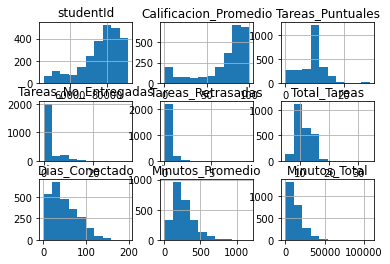

In [123]:
df.hist()
plt.show()

In [134]:
datos_numericos = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_var_numericas = df.select_dtypes(include=datos_numericos).copy()
col_total_nulos = df_var_numericas.isnull().sum()
serie_col_nombres = col_total_nulos[col_total_nulos > 0]
display(serie_col_nombres)

Series([], dtype: int64)

In [135]:
for columna in serie_col_nombres.keys():
        mean_col=np.mean(df_var_numericas[columna])
        df_var_numericas[columna].replace(np.nan, mean_col, inplace=True)   
display('Verificación de datos faltantes : {0}'.format(df_var_numericas.isnull().sum().max()))

'Verificación de datos faltantes : 0'

In [136]:
factor_datos_faltantes = 0.8
df_var_no_numericas = df[df.columns.difference(df_var_numericas.columns)].copy()
max_factor_moda = len(df_var_no_numericas)*factor_datos_faltantes
display('Máximo fator de datos faltantes : {0}'.format(max_factor_moda))
total_no_numericas = df_var_no_numericas.isna().sum()
serie_col_nombres = total_no_numericas[total_no_numericas > 0]
display(serie_col_nombres)

'Máximo fator de datos faltantes : 2000.0'

Series([], dtype: int64)

In [90]:
# Visualizando los datos faltantes del dataset antes de la primera transformación (df_data_2)
print("Valores nulos antes de la transformación DropNA: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos antes de la transformación DropNA: 

studentId                0
reducido                 0
ciclo                    0
Graduado                 0
Calificacion_Promedio    0
Tareas_Puntuales         0
Tareas_No_Entregadas     0
Tareas_Retrasadas        0
Total_Tareas             0
materias                 0
Dias_Conectado           0
Minutos_Promedio         0
Minutos_Total            0
dtype: int64



In [139]:
# Aplicando la función para borrar todas las filas con valor NaN en la columna ``Graduado``:
df2 = df.dropna(axis='index', how='any', subset=['Graduado'])

In [140]:
# Visualizando los datos faltantes del dataset antes de la primera transformación (SimpleImputer) (df_data_3)
print("Valores nulos antes de la transformación SimpleImputer: \n\n{}\n".format(df2.isnull().sum(axis = 0)))

Valores nulos antes de la transformación SimpleImputer: 

studentId                0
reducido                 0
ciclo                    0
Graduado                 0
Calificacion_Promedio    0
Tareas_Puntuales         0
Tareas_No_Entregadas     0
Tareas_Retrasadas        0
Total_Tareas             0
Dias_Conectado           0
Minutos_Promedio         0
Minutos_Total            0
materias                 0
dtype: int64



### Procesando valores NaN con SimpleImputer de sklearn

Para los otros valores NaN vamos a usar como **ejemplo** la sustitución por la constante 0. 

Usted puede escoger cualquier estrategia que crea que es la mejor para esto :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [93]:
from sklearn.impute import SimpleImputer
import numpy as np


# Creando un objeto ``SimpleImputer``
impute_zeros = SimpleImputer(
    missing_values=np.nan,  # Los valores faltantes son de tipo ``np.nan`` (estandar Pandas)
    strategy='constant',  # La estrategia escogida es reemplazar por una constante
    fill_value=0,  # La constante que será usada para reemmplazar los valores faltantes es un int64=0.
    verbose=0,
    copy=True
)

In [94]:
# Visualizando los datos faltantes del dataset antes de la segunda transformación (df_data_2)
print("Valores nulos antes de transformación SimpleImputer: \n\n{}\n".format(df2.isnull().sum(axis = 0)))

# Aplicar la transformación ``SimpleImputer`` en el conjunto de datos base
impute_zeros.fit(X=df)

# Reconstrucción del nuevo DataFrame Pandas (df_data_3)
df = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df
    ),  # El resultado SimpleImputer.transform(<<pandas dataframe>>) es una lista de listas
    columns=df.columns  # Las columnas originals deben ser conservadas en esta transformación
)

# Visualizndo los datos faltantes del dataset 
print("Valores nulos del dataset despues de la transformación SimpleImputer: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos antes de transformación SimpleImputer: 

studentId                0
reducido                 0
ciclo                    0
Graduado                 0
Calificacion_Promedio    0
Tareas_Puntuales         0
Tareas_No_Entregadas     0
Tareas_Retrasadas        0
Total_Tareas             0
materias                 0
Dias_Conectado           0
Minutos_Promedio         0
Minutos_Total            0
dtype: int64

Valores nulos del dataset despues de la transformación SimpleImputer: 

studentId                0
reducido                 0
ciclo                    0
Graduado                 0
Calificacion_Promedio    0
Tareas_Puntuales         0
Tareas_No_Entregadas     0
Tareas_Retrasadas        0
Total_Tareas             0
materias                 0
Dias_Conectado           0
Minutos_Promedio         0
Minutos_Total            0
dtype: int64



### Eliminando columnas no desadas

Vamos a **demostrar** acontinuación como usar el metodo DataFrame.drop().

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [141]:
df.tail()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,materias
2495,91320.0,Adm. Emp.,2019 - 08,No,71.818182,9.0,2.0,0.0,11.0,21.0,468.019048,9828.40,Impuestos
2496,91330.0,I. A.,2019 - 08,Si,81.333333,15.0,0.0,0.0,15.0,90.0,431.348000,38821.32,Redes Neuronales
2497,91331.0,Gest. Esc.,2019 - 08,No,73.333333,9.0,0.0,0.0,9.0,27.0,171.675926,4635.25,Evaluación de Instituciones Educativos
2498,91335.0,Gest. Esc.,2019 - 08,Si,85.185556,9.0,0.0,0.0,9.0,102.0,256.105686,26122.78,Evaluación de Instituciones Educativos
2499,91346.0,Psicopat. Adol.,2019 - 08,No,80.159333,15.0,0.0,0.0,15.0,26.0,230.841538,6001.88,Psicopatología y conductas de riesgo


In [96]:
#df2 = df.drop(columns=['reducido'], inplace=False)

In [142]:
df2.tail()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,materias
2495,91320.0,Adm. Emp.,2019 - 08,No,71.818182,9.0,2.0,0.0,11.0,21.0,468.019048,9828.40,Impuestos
2496,91330.0,I. A.,2019 - 08,Si,81.333333,15.0,0.0,0.0,15.0,90.0,431.348000,38821.32,Redes Neuronales
2497,91331.0,Gest. Esc.,2019 - 08,No,73.333333,9.0,0.0,0.0,9.0,27.0,171.675926,4635.25,Evaluación de Instituciones Educativos
2498,91335.0,Gest. Esc.,2019 - 08,Si,85.185556,9.0,0.0,0.0,9.0,102.0,256.105686,26122.78,Evaluación de Instituciones Educativos
2499,91346.0,Psicopat. Adol.,2019 - 08,No,80.159333,15.0,0.0,0.0,15.0,26.0,230.841538,6001.88,Psicopatología y conductas de riesgo


### Manejando variables Categoricas

Como se menciono antes, los computadores no son buenos con las variables categoricas.

Mientras que nosotros entendemos bien las variables categoricas, es debido a un conocimiento previo quie el computador no tiene.

La mayoria de tecnicas de Machine Learning y modelso trabajan con un set limitado de datos (Tipicamente binario). 

Las redes neurales consumenda data y producen resultados en el rango de 0..1 t raramente van mas alla del alcance.

En resumen, la gran mayoria de algoritmos de machine learning aceptan data de entrada  ("training data") de donde los features son extraidos.

Basado en estos features, un modelo matematico es creado, el cual es usado para hacer una predicción o decision sin ser programado explicitamente para esa tarea.

Dado un dataset con con 2 features, vamos a dejar que encoder encuentre los valores unicos por features y transforme la data a binario usando la tecnica one-hot encoding.

In [144]:
# Columnas One-hot-encoding del dataset usando el metodo de Pandas ``get_dummies``  (demontración)
df3 = pd.get_dummies(df2, columns=['ciclo','reducido','materias'])
df3.tail()

,studentId,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,...,materias_Tendencias actuales de entrenamiento juvenil (de 12 a 18 años),materias_Tendencias actuales de entrenamiento universitario (de 19 a 24 años),materias_Tendencias actuales del entrenamiento infantil (de 6 a 12 años),materias_Toma de Decisiones,materias_Trabajo en Equipo,materias_Trastornos de la conducta alimentaria (TCA),materias_Trastornos y dificultades de aprendizaje en aptitudes académicas,materias_Tratamientos Tradicionales de Obesidad Infantil,materias_Valuación de Empresas,materias_Visión Comercial
2495,91320.0,No,71.818182,9.0,2.0,0.0,11.0,21.0,468.019048,9828.40,...,0,0,0,0,0,0,0,0,0,0
2496,91330.0,Si,81.333333,15.0,0.0,0.0,15.0,90.0,431.348000,38821.32,...,0,0,0,0,0,0,0,0,0,0
2497,91331.0,No,73.333333,9.0,0.0,0.0,9.0,27.0,171.675926,4635.25,...,0,0,0,0,0,0,0,0,0,0
2498,91335.0,Si,85.185556,9.0,0.0,0.0,9.0,102.0,256.105686,26122.78,...,0,0,0,0,0,0,0,0,0,0
2499,91346.0,No,80.159333,15.0,0.0,0.0,15.0,26.0,230.841538,6001.88,...,0,0,0,0,0,0,0,0,0,0


<hr>

## Entrenando un clasificador basado  en un Árbol de Decisión

### Seleccionando FEATURES y definiendo la variable TARGET

In [145]:
df3.columns

Index(['studentId', 'Graduado', 'Calificacion_Promedio', 'Tareas_Puntuales',
       'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas',
       'Dias_Conectado', 'Minutos_Promedio', 'Minutos_Total',
       ...
       'materias_Tendencias actuales de entrenamiento juvenil (de 12 a 18 años)',
       'materias_Tendencias actuales de entrenamiento universitario (de 19 a 24 años)',
       'materias_Tendencias actuales del entrenamiento infantil (de 6 a 12 años)',
       'materias_Toma de Decisiones', 'materias_Trabajo en Equipo',
       'materias_Trastornos de la conducta alimentaria (TCA)',
       'materias_Trastornos y dificultades de aprendizaje  en aptitudes académicas',
       'materias_Tratamientos Tradicionales de Obesidad Infantil',
       'materias_Valuación de Empresas', 'materias_Visión Comercial'],
      dtype='object', length=311)

In [147]:
var_cols = df3.columns
cols_modelo  = [v for v in var_cols if v != 'Graduado']

features = df3[
    cols_modelo
]
target = df3['Graduado']  ## No cambie la variable target!

### Dividiendo nuestro dataset en set de Entrenamiento y Pruebas

In [148]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=133)

### Entrenando un modelo ``DecisionTreeClassifier()``

In [149]:
# Método para creacion de modelos basados en arbol de desición
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier(max_depth=15).fit(X_train, y_train)

### Haciendo predicciones del Sample Test

In [150]:
y_pred = dtc.predict(X_test)
print(y_pred)

['Si' 'No' 'No' 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si'
 'No' 'No' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'No' 'No' 'No' 'No' 'Si' 'Si'
 'No' 'Si' 'No' 'Si' 'No' 'No' 'No' 'Si' 'Si' 'No' 'Si' 'No' 'Si' 'No'
 'No' 'Si' 'Si' 'No' 'No' 'No' 'No' 'Si' 'Si' 'No' 'Si' 'No' 'Si' 'Si'
 'Si' 'Si' 'No' 'Si' 'No' 'Si' 'No' 'No' 'Si' 'Si' 'No' 'No' 'Si' 'Si'
 'No' 'No' 'No' 'Si' 'No' 'Si' 'No' 'Si' 'Si' 'No' 'Si' 'Si' 'No' 'No'
 'No' 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'Si' 'No' 'No' 'Si' 'Si' 'No'
 'No' 'Si' 'No' 'Si' 'Si' 'No' 'No' 'No' 'Si' 'No' 'No' 'No' 'No' 'Si'
 'Si' 'Si' 'No' 'No' 'Si' 'No' 'No' 'No' 'No' 'No' 'Si' 'Si' 'Si' 'No'
 'Si' 'No' 'No' 'Si' 'Si' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'No' 'Si' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'Si' 'No' 'Si' 'No' 'Si' 'Si' 'No' 'Si'
 'No' 'No' 'No' 'Si' 'No' 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'No' 'Si'
 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'Si' 'No' 'No' 'Si' 'Si' 'Si' 'No' 'Si'
 'Si' 'No' 'No' 'Si' 'Si' 'Si' 'No' 'Si' 'No' 'No' 'No' 'No' 'No' 'Si'
 'No' 

### Analice la calidad del modelo a través de la matriz de confusión

In [28]:
!pip install seaborn --upgrade

/bin/bash: pip: command not found


Text(0.5, 15.0, 'Predicted label\n\nAccuracy=0.786\nPrecision=0.767\nRecall=0.819\nF1 Score=0.7922330097087379')

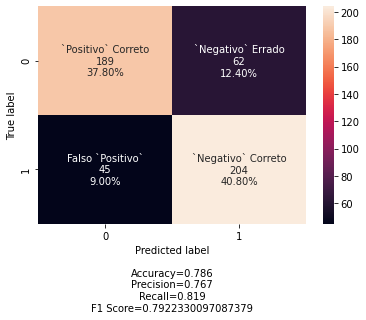

In [151]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['`Positivo` Correto', '`Negativo` Errado', 'Falso `Positivo`', '`Negativo` Correto']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
f1_score  = 2*precision*recall / (precision + recall)
sns.heatmap(cf_matrix, annot=labels, fmt="")
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={}".format(accuracy, precision, recall, f1_score)
plt.ylabel('True label')
plt.xlabel('Predicted label' + stats_text)

<hr>

## Scoring de la data requerida para hacer la entrega de la solución

Para el envío, necesita clasificar el siguiente dataset. Para hacer eso, usted necesita reproducir los mismos pasos de pre-procesamiento para que el dataset este en la misma estructura del que usted uso para construir su modelo. Despues de clasificar este dataframe, esperamos que usted entregue un archivo csv con las 2499 filar y una columna 'Graduado' con su predicción. **No cambie el orden del archivo a predecir ni borre filas**

In [30]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/for_submission/ToBePredicted.csv
df_to_be_predicted = pd.read_csv(r'ToBePredicted.csv')
df_to_be_predicted.tail()

--2020-09-12 17:51:46--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/for_submission/ToBePredicted.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.204.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.204.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33892 (33K) [text/plain]
Saving to: ‘ToBePredicted.csv’

ToBePredicted.csv   100%[===================>]  33.10K  --.-KB/s    in 0.1s    

2020-09-12 17:51:47 (250 KB/s) - ‘ToBePredicted.csv’ saved [33892/33892]



,studentId,reducido,ciclo
995,79594.0,Diagn. Psicoped.,2019 - 05
996,69470.0,Ventas Estrat.,2018 - 08
997,72921.0,Big Data,2019 - 02
998,80608.0,Interv. Psicoped,2019 - 05
999,86966.0,Interv. Psicoped,2019 - 07


In [31]:
# Uniendo los dataset
df = pd.merge(
    df_to_be_predicted, df_tabla_tareas, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)

# Eliminando la columna 'reducido'
df2 = df.drop(columns=['reducido'], inplace=False)

# Columnas One-hot-encoding del dataset usando el metodo de Pandas ``get_dummies``  (demontración)
df3 = pd.get_dummies(df2, columns=['ciclo'])
df3.tail()

,studentId,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,ciclo_2017 - 03,ciclo_2017 - 04,ciclo_2017 - 05,ciclo_2017 - 06,...,ciclo_2018 - 07,ciclo_2018 - 08,ciclo_2019 - 01,ciclo_2019 - 02,ciclo_2019 - 03,ciclo_2019 - 04,ciclo_2019 - 05,ciclo_2019 - 06,ciclo_2019 - 07,ciclo_2019 - 08
995,91291.0,0.000,0.0,12.0,0.0,12.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
996,91312.0,76.580,5.0,0.0,0.0,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
997,91329.0,86.410,13.0,0.0,0.0,13.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
998,91345.0,0.000,0.0,9.0,0.0,9.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
999,91437.0,75.024,15.0,0.0,0.0,15.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Observando los features declarados acontinuación, sabemos que el dataset ha ser evaluado esta en el mismo formato usado para entrenar nuestro árbol de decisión anteriormente.

```features = df3[
    [
        'studentId', 'Calificacion_Promedio', 'Tareas_Puntuales',
        'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas',
        'ciclo_2017 - 03', 'ciclo_2017 - 04', 'ciclo_2017 - 05',
        'ciclo_2017 - 06', 'ciclo_2017 - 07', 'ciclo_2017 - 08',
        'ciclo_2018 - 01', 'ciclo_2018 - 02', 'ciclo_2018 - 03',
        'ciclo_2018 - 04', 'ciclo_2018 - 05', 'ciclo_2018 - 06',
        'ciclo_2018 - 07', 'ciclo_2018 - 08', 'ciclo_2019 - 01',
        'ciclo_2019 - 02', 'ciclo_2019 - 03', 'ciclo_2019 - 04',
        'ciclo_2019 - 05', 'ciclo_2019 - 06', 'ciclo_2019 - 07',
        'ciclo_2019 - 08'
    ]
]
target = df3['Graduado']  ## No cambie la variable target!```

In [ ]:
y_pred = dtc.predict(df3[
    [
        'studentId', 'Calificacion_Promedio', 'Tareas_Puntuales',
        'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas',
        'ciclo_2017 - 03', 'ciclo_2017 - 04', 'ciclo_2017 - 05',
        'ciclo_2017 - 06', 'ciclo_2017 - 07', 'ciclo_2017 - 08',
        'ciclo_2018 - 01', 'ciclo_2018 - 02', 'ciclo_2018 - 03',
        'ciclo_2018 - 04', 'ciclo_2018 - 05', 'ciclo_2018 - 06',
        'ciclo_2018 - 07', 'ciclo_2018 - 08', 'ciclo_2019 - 01',
        'ciclo_2019 - 02', 'ciclo_2019 - 03', 'ciclo_2019 - 04',
        'ciclo_2019 - 05', 'ciclo_2019 - 06', 'ciclo_2019 - 07',
        'ciclo_2019 - 08'
    ]
])
print(y_pred)

### Guardando los resultados de la predicción en un archivo csv

In [ ]:
np.savetxt("results.csv", y_pred, delimiter=",", fmt='%s')

In [ ]:
project.save_data(file_name="results.csv", data=pd.read_csv("results.csv", header=None).to_csv(header=["TARGET"], index=False))

<hr>

## ¡Felicitaciones!

Si todo fue ejecutado sin errores, usted ya tiene un modelo basado en classificacion binaria y puede descargar sus resultados para subirlos como csv!

Para enviar su solución, ve a la página:

# https://anahuac.maratona.dev
